<a href="https://colab.research.google.com/github/amFarrouk/Lawnchair/blob/alpha/TransferModel(VGG16)_whurs__aug40_SAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import pandas as pd
import os
import matplotlib.pyplot as plt
import zipfile
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#!wget https://doc-08-8s-docs.googleusercontent.com/docs/securesc/78sd4ofia6ilotkrk7b0jldtpiipsguk/i69g6lef4t465jmm1s12ks60dls6iap0/1648246800000/06583234309955973519/06583234309955973519/1NXjzQcE_rmmoZZ0PgUi62oRIgvuK-YVy?e=download&ax=ACxEAsZcpTXMsN1TvbxLuR1bu5kS2sr9PinWowrlidm-hqrmNTVRTF8ZVFGam5nqTVeV1Yx08vanLNIVrfyFOeKpkKmyNlJyjm7mRAhEjwPvSRfWJBZ4TRqhiyP_y3YoiOedAukMaTN-WkSVpTGDlZeeUUslXf4myB277BHUitV3W47Qq_5H-yZD3g-X234BedDg0WL4NNU-sqjStlQwZMajVLbo-ZfQz51WKYHc2l2vva07bGvUMoo5Y0kI0V8MJXZrYOSmx7WkuVh-KW8SGPLbXAIxI4l4ubE6Gm0t6RvoQap3p1gA89EDCvNziat8a3epxVujrwldmsSzgm5TN64xzDBR-RkofBVmCmeisL2COThvjlB2oMbP7jvuUJaXKJ9P8Podc-SUsvXmrdl9baULqmqTUi_V2Oq_FiCk20KioZxZ2Pua4Lfw58o5Wf6BPxWRqU5df_idDDzhXMfvWJJV0jmmABRDymd7Rlnb4ydQ1YfTpNH-JZIDUT005ThPLwduUVJVG9J5wn1nwkzifjYNju3S8W1ooqrCkO1Ezz5msSzsddgLMZktcxYUtaMD2Rx_Vp9jdAWo7tUDuwyYByGezCc31rv2oClRBQnISoXyL28gNOX5tIAGDY3LZQo7_tDNTo_EmLQGgiyO7Pz5FQztdQe3w7CyVE7EDnpLR9v12y_Dnp-3Udj2YqH1I4LaE3f8_f8ChaB84H8-rHjBCtkBbDa2fJ9yzR6MwnJuyCvEpf1EFs_2eO-D7Zs1RSo65Aaw_dCdvVGdrwdT2ooY7khPG1PlMsGNTZd7lGPV0neWHIvClKUfx6tLm9M&authuser=2 -O ./UCMerced_LandUse.zip
!mkdir WHURS19/
!unzip -qq ./drive/MyDrive/MemoireM2/Scripts/dataSet_WHU19_aug40.zip -d ./WHURS19
#!rm ./UCMerc.zip

In [4]:
img1=cv2.imread("./WHURS19/airport_24.jpg",cv2.IMREAD_COLOR)
img1=cv2.resize(img1,(256,256))
img2=cv2.imread("./WHURS19/Farmland-06.jpg",cv2.IMREAD_COLOR)
img2=cv2.resize(img2,(256,256))
img3=cv2.imread("./WHURS19/Mountain_01.jpg",cv2.IMREAD_COLOR)
img3=cv2.resize(img3,(256,256))
img4=cv2.imread("./WHURS19/Park_41.jpg",cv2.IMREAD_COLOR)
img4=cv2.resize(img4,(256,256))

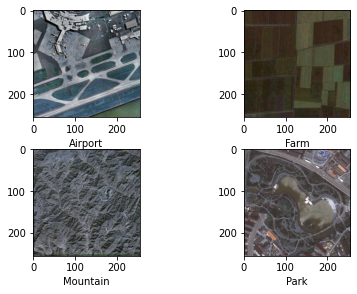

In [5]:
fig, axarr = plt.subplots(2,2)
fig.tight_layout()

axarr[0,0].imshow(img1)
axarr[0,0].set_xlabel("Airport")
axarr[0,1].imshow(img2)
axarr[0,1].set_xlabel("Farm")
axarr[1,0].imshow(img3)
axarr[1,0].set_xlabel("Mountain")
axarr[1,1].imshow(img4)
axarr[1,1].set_xlabel("Park")

plt.savefig("whurs_sum.png")
pass

In [6]:
def load_images_names_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        if filename is not None:
            images.append(filename)
    return images

In [7]:
def split_lambda(x):
  if "_" in x:
    return x.split("_")[0]
  elif "-" in x:
    return x.split("-")[0]

In [8]:
whurs_list=load_images_names_from_folder("./WHURS19")

In [9]:
whurs_series=pd.Series(whurs_list)
whurs_df=pd.DataFrame(whurs_series,columns=["img"])
whurs_df=whurs_df.sort_values("img")

whurs_df["label"]=whurs_df["img"].apply(lambda x : split_lambda(x))

In [10]:
whurs_df.to_csv("whurs19.csv",header=False,index=False)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
all_x,all_y=whurs_df["img"],whurs_df["label"]

xtrain,xtest,ytrain,ytest=train_test_split(all_x,all_y,train_size=0.8,random_state=1,shuffle=True,stratify=all_y)

train_df=pd.DataFrame(xtrain,columns=["img"])
train_df["label"]=ytrain

print("train_data:")
train_df.head()

train_data:


,img,label
915,footballField_19.jpg,footballField
1038,meadow_28gen.jpg,meadow
723,Park_49gen.jpg,Park
175,Farmland-42.jpg,Farmland
480,residential_54.jpg,residential


In [13]:
test_df=pd.DataFrame(xtest,columns=["img"])
test_df["label"]=ytest

print("test_data:")
test_df.head()

test_data:


,img,label
1264,Mountain_36.jpg,Mountain
157,Park_49.jpg,Park
874,industrial_29.jpg,industrial
706,residential_06.jpg,residential
233,pond_46.jpg,pond


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
train_image_gen=ImageDataGenerator(rescale=1/255.0)
test_image_gen=ImageDataGenerator(rescale=1/255.0)

In [16]:
train_image_gened=train_image_gen.flow_from_dataframe(train_df,x_col="img",y_col="label",
                                            directory="./WHURS19",
                                            batch_size=32,
                                            target_size=(256,256),
                                            color_mode='rgb',
                                            class_mode='sparse')

Found 1125 validated image filenames belonging to 19 classes.


In [18]:
test_image_gened=test_image_gen.flow_from_dataframe(test_df,x_col="img",y_col="label",
                                            directory="./WHURS19",
                                            batch_size=32,
                                            target_size=(256,256),
                                            color_mode='rgb',
                                            class_mode='sparse',
                                            shuffle=False)

Found 282 validated image filenames belonging to 19 classes.


In [19]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [20]:
import tensorflow.keras.models as models
from tensorflow.keras.layers import Flatten,Dense,Dropout

In [21]:
pretrained_model= tf.keras.applications.VGG16(include_top=False,weights='imagenet',classes=19,input_shape=(256,256,3))
for layer in pretrained_model.layers[:-4]:
        layer.trainable=False

for layer in pretrained_model.layers:
  print(layer.name,"is trainable : ",layer.trainable)
#pretrained_model.summary()

58900480/58889256 [==============================] - 0s 0us/step
input_1 is trainable :  False
block1_conv1 is trainable :  False
block1_conv2 is trainable :  False
block1_pool is trainable :  False
block2_conv1 is trainable :  False
block2_conv2 is trainable :  False
block2_pool is trainable :  False
block3_conv1 is trainable :  False
block3_conv2 is trainable :  False
block3_conv3 is trainable :  False
block3_pool is trainable :  False
block4_conv1 is trainable :  False
block4_conv2 is trainable :  False
block4_conv3 is trainable :  False
block4_pool is trainable :  False
block5_conv1 is trainable :  True
block5_conv2 is trainable :  True
block5_conv3 is trainable :  True
block5_pool is trainable :  True


In [22]:
#building costum model
x = Flatten()(pretrained_model.output)
x = Dense(128, activation=tf.keras.activations.selu)(x)
x = Dropout(0.5)(x)
x = Dense(128, activation=tf.keras.activations.selu)(x)
x = Dropout(0.5)(x)
predictions = Dense(19, activation=tf.keras.activations.softmax)(x)

model=tf.keras.models.Model(inputs=pretrained_model.input, outputs=predictions)

In [23]:
#Loss and Optimizer
loss=tf.keras.losses.sparse_categorical_crossentropy
optim=tf.keras.optimizers.Adamax(learning_rate=1e-4)
#CallBacks
#earlyStopCall=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=5)
lrCall = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))
#model compilation
model.compile(optimizer=optim, loss=loss, metrics=['accuracy'])

#_=tf.keras.utils.plot_model(
#    model, to_file='./transferModel_whurs_SAT.png', show_shapes=True, show_layer_names=False)
#model.summary()

In [25]:
#defining best learing rate
history=model.fit(train_image_gened,epochs=10,steps_per_epoch=35,validation_data=test_image_gened,callbacks=[lrCall])

Epoch 1/10
35/35 [==============================] - 12s 336ms/step - loss: 0.1469 - accuracy: 0.9652 - val_loss: 0.1350 - val_accuracy: 0.9610 - lr: 1.0000e-04
Epoch 2/10
35/35 [==============================] - 12s 351ms/step - loss: 0.1293 - accuracy: 0.9671 - val_loss: 0.1311 - val_accuracy: 0.9645 - lr: 1.1220e-04
Epoch 3/10
35/35 [==============================] - 12s 333ms/step - loss: 0.1366 - accuracy: 0.9643 - val_loss: 0.1162 - val_accuracy: 0.9752 - lr: 1.2589e-04
Epoch 4/10
35/35 [==============================] - 12s 330ms/step - loss: 0.1032 - accuracy: 0.9780 - val_loss: 0.1310 - val_accuracy: 0.9610 - lr: 1.4125e-04
Epoch 5/10
35/35 [==============================] - 12s 326ms/step - loss: 0.0914 - accuracy: 0.9790 - val_loss: 0.1042 - val_accuracy: 0.9716 - lr: 1.5849e-04
Epoch 6/10
35/35 [==============================] - 12s 326ms/step - loss: 0.0958 - accuracy: 0.9707 - val_loss: 0.1263 - val_accuracy: 0.9645 - lr: 1.7783e-04
Epoch 7/10
35/35 [======================

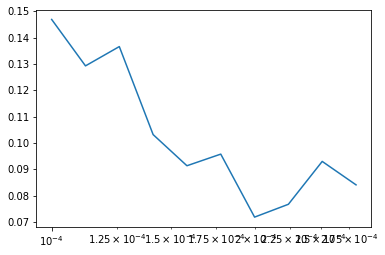

In [27]:
plt.semilogx(history.history["lr"], history.history["loss"])
#plt.axis([1e-4, 3e-4, 0, 3])
#plt.savefig("LR_TransferModelVGG16_whurs_aug40_SAT.png")
#!mv ./LR_TransferModelVGG16_whurs_aug40_SAT.png ./drive/MyDrive/MemoireM2/Scripts/screens/LR_TransferModelVGG16_whurs_aug40_SAT.png

In [28]:
#Loss and Optimizer
loss=tf.keras.losses.sparse_categorical_crossentropy
optim=tf.keras.optimizers.Adamax(learning_rate=2.2387e-04)
#CallBacks
earlyStopCall=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=5)

bestStopCall=tf.keras.callbacks.ModelCheckpoint(filepath=r"./checkpoint.h5", monitor='val_accuracy',
                                                verbose=1,
                                                save_weights_only=True,
                                                mode='max',
                                                save_best_only=True)
#lrCall = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))
#model compilation
model.compile(optimizer=optim, loss=loss, metrics=['accuracy'])

#_=tf.keras.utils.plot_model(
#    model, to_file='./transferModel_whurs_SAT.png', show_shapes=True, show_layer_names=False)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [34]:
history=model.fit(train_image_gened,epochs=50,steps_per_epoch=35,validation_data=test_image_gened,callbacks=[bestStopCall,earlyStopCall])

Epoch 1/50
35/35 [==============================] - ETA: 0s - loss: 0.0204 - accuracy: 0.9945
Epoch 1: val_accuracy did not improve from 0.97518
35/35 [==============================] - 12s 327ms/step - loss: 0.0204 - accuracy: 0.9945 - val_loss: 0.1428 - val_accuracy: 0.9716
Epoch 2/50
35/35 [==============================] - ETA: 0s - loss: 0.0135 - accuracy: 0.9954
Epoch 2: val_accuracy did not improve from 0.97518
35/35 [==============================] - 11s 325ms/step - loss: 0.0135 - accuracy: 0.9954 - val_loss: 0.1633 - val_accuracy: 0.9539
Epoch 3/50
35/35 [==============================] - ETA: 0s - loss: 0.0120 - accuracy: 0.9973
Epoch 3: val_accuracy did not improve from 0.97518
35/35 [==============================] - 12s 332ms/step - loss: 0.0120 - accuracy: 0.9973 - val_loss: 0.1395 - val_accuracy: 0.9645
Epoch 4/50
35/35 [==============================] - ETA: 0s - loss: 0.0246 - accuracy: 0.9927
Epoch 4: val_accuracy did not improve from 0.97518
35/35 [=================

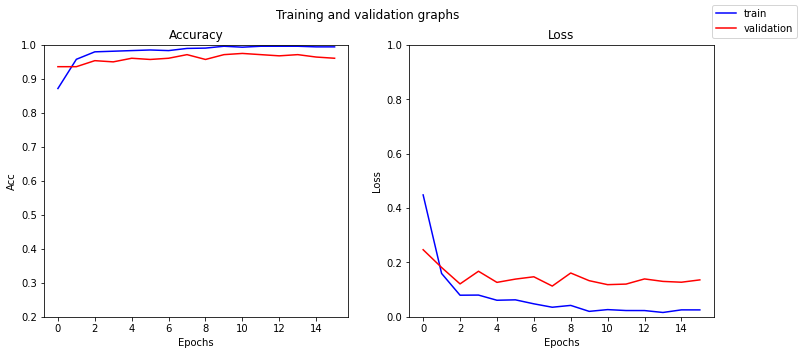

In [32]:
#----------------------------------------------------------------
# Plot training and validation accuracy per epoch for both models
#----------------------------------------------------------------
fig, (axs1, axs2) = plt.subplots(1, 2,figsize=(12,5),sharey=False)
fig.suptitle('Training and validation graphs')
#plt.axis(ymin=0.2,ymax=1,xmin=0)
axs1.set_title('Accuracy')
axs1.axis(ymin=0.2,ymax=1)
axs1.set(xlabel="Epochs",ylabel="Acc")
axs1.plot(history.epoch, history.history['accuracy'],'b',label="train")
axs1.plot(history.epoch, history.history['val_accuracy'],'r',label="validation")

axs2.set_title('Loss')
axs2.axis(ymin=0,ymax=1)
axs2.set(xlabel="Epochs",ylabel="Loss")
axs2.plot(history.epoch, history.history['loss'],'b')
axs2.plot(history.epoch, history.history['val_loss'],'r')

fig.legend(loc="upper right")
plt.savefig("res_TransferModelVGG16_whurs_aug40_SAT.png")
#!mv ./res_TransferModelVGG16_whurs_aug40_SAT.png ./drive/MyDrive/MemoireM2/Scripts/screens/res_TransferModelVGG16_whurs_aug40_SAT.png
plt.show()

In [35]:
model.load_weights("./checkpoint.h5")

In [37]:
test_df.head(10)

,img,label
1264,Mountain_36.jpg,Mountain
157,Park_49.jpg,Park
874,industrial_29.jpg,industrial
706,residential_06.jpg,residential
233,pond_46.jpg,pond
1220,parking_35.jpg,parking
887,Desert_01gen.jpg,Desert
840,bridge_09.jpg,bridge
783,Farmland-37gen.jpg,Farmland
1039,bridge_24gen.jpg,bridge


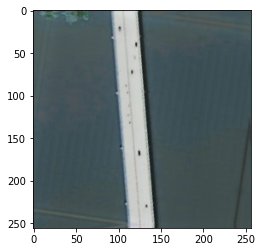

img_batch shape (1, 256, 256, 3)


6

In [40]:
img_path="./WHURS19/bridge_24gen.jpg"
img = cv2.imread(img_path,cv2.IMREAD_COLOR)
img= cv2.resize(img,(256,256))
img=img/255.0

plt.imshow(img)
plt.show()

img_array = tf.keras.preprocessing.image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

print("img_batch shape",img_batch.shape)

prediction = model.predict(img_batch)
np.argmax(prediction,axis=1)[0]

In [41]:
test_image_gened.class_indices

{'Desert': 0,
 'Farmland': 1,
 'Mountain': 2,
 'Park': 3,
 'airport': 4,
 'beach': 5,
 'bridge': 6,
 'commercial': 7,
 'footballField': 8,
 'forest': 9,
 'industrial': 10,
 'meadow': 11,
 'parking': 12,
 'pond': 13,
 'port': 14,
 'railwayStation': 15,
 'residential': 16,
 'river': 17,
 'viaduct': 18}

In [42]:
predictions=np.argmax(model.predict(test_image_gened),axis=1)
labels=test_df["label"].apply(lambda x : test_image_gened.class_indices[x])
labels=labels.values.tolist()

In [43]:
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred, normalize='pred')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 19)), labels=classes,rotation = 90)
    plt.yticks(list(range(0, 19)), labels=classes)
    plt.colorbar(ctx)
    #plt.savefig("mat_TransferModelVGG16_whurs_aug40_SAT.png")
    #!mv ./mat_TransferModelVGG16_whurs_aug40_SAT.png ./drive/MyDrive/MemoireM2/Scripts/screens/mat_TransferModelVGG16_whurs_aug40_SAT.png
    plt.show()

In [44]:
classes=[str(key) for key in test_image_gened.class_indices]

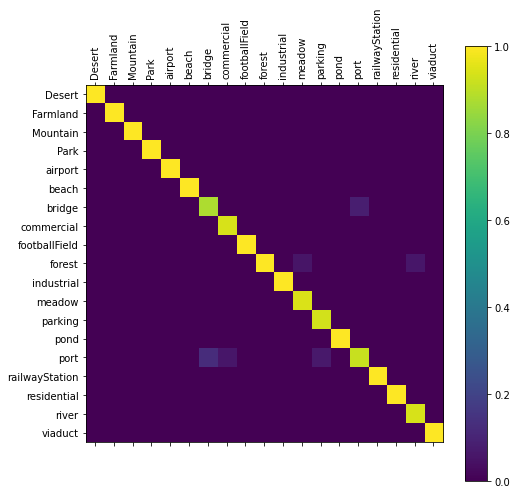

In [45]:
show_confusion_matrix(labels, predictions, list(classes))

In [46]:
!mv ./checkpoint.h5 ./drive/MyDrive/MemoireM2/Scripts/weights/TransferModelVGG16_whurs__aug40.h5